In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
output_path = "/home/yz685/saasbo_group_testing/experiments/hartmann_50/"
num_trials = 100

In [3]:
trial_idx = 0
torch.load(output_path + f"dim_selection_trial={trial_idx}.th")

{'trial_idx': 0,
 'emb_indices': array([28, 11, 10, 41,  2, 27]),
 'seq_bif': [{'perturb_option': 'ub', 'num_correct': 6, 'num_samples': 37},
  {'perturb_option': 'lb', 'num_correct': 6, 'num_samples': 37},
  {'perturb_option': 'random', 'num_correct': 6, 'num_samples': 37}],
 'saasgp': [{'num_correct': 1, 'num_samples': 25},
  {'num_correct': 1, 'num_samples': 50},
  {'num_correct': 2, 'num_samples': 75},
  {'num_correct': 2, 'num_samples': 100}]}

In [4]:
outputs = []

for trial_idx in range(num_trials):
    outputs.append(torch.load(output_path + f"dim_selection_trial={trial_idx}.th"))

In [5]:
seq_bif_num_samples = []
for output in outputs:
    seq_bif_num_samples.append(output['seq_bif'][0]['num_samples'])

(array([ 1.,  1.,  3.,  6.,  9.,  9., 13., 29., 15., 14.]),
 array([27. , 29.2, 31.4, 33.6, 35.8, 38. , 40.2, 42.4, 44.6, 46.8, 49. ]),
 <BarContainer object of 10 artists>)

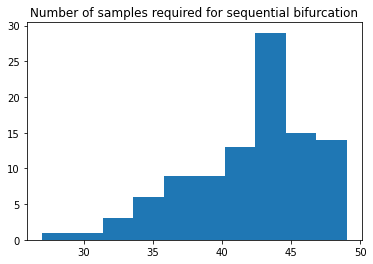

In [6]:
plt.title('Number of samples required for sequential bifurcation')
plt.hist(seq_bif_num_samples)

# sequential bifurcation identifies all dims correctly, since evaluations are noiseless for now

In [7]:
from collections import defaultdict

saasgp_num_correct = defaultdict(list)

for output in outputs:

    for subresult in output['saasgp']:

        saasgp_num_correct[subresult['num_samples']].append(subresult['num_correct'])


Text(0.5, 1.05, '# important dimensions out of 6 that SAASGP correctly identified')

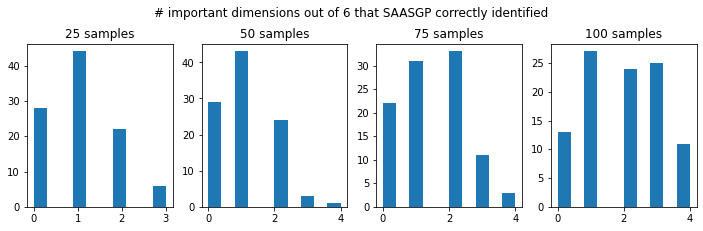

In [8]:
fig, axs = plt.subplots(1,4,figsize=(12,3))

index_mapping = {0: 25, 1: 50, 2: 75, 3: 100}

for i in index_mapping:
    axs[i].hist(saasgp_num_correct[index_mapping[i]])
    axs[i].set_title(f"{index_mapping[i]} samples")

fig.suptitle('# important dimensions out of 6 that SAASGP correctly identified', y=1.05)


